
Copyright 2025, European Space Agency (ESA)
Licensed under ESA Software Community Licence Permissive (Type 3) - v2.4

## 🌱 Coherence CSV Analysis — Overview

This notebook processes a CSV file generated by the *check_interferogram_normalbaseline* bulk tool.  
The CSV contains several metadata fields for each interferogram pair, including:

- **Primary and Secondary STA products**
- **normalBaseline and orbit information**
- **Coherence values  and its statistics**

The goal of this analysis is to:

- **Filter rows** based on one or more substrings found in the fields  
  `primary_sta` or `secondary_sta`
- **Extract** the corresponding `mean(|coh|)` values
- **Analyse** the results numerically and visually (plots + histogram)


## 🌿 1.  Load the CSV and Configure Filters

In this section, the CSV file is loaded with pandas.

The script builds a regular expression pattern, searches for matches in the selected columns,
and extracts only the rows corresponding to the desired date(s), for example.

Outputs include:

- Filtered rows
- List of extracted mean(|coh|) values
- Total number of matches found

In [1]:
import pandas as pd
import re  # for regular expressions

# --- User settings ---
csv_file = "coherence_summary-COMM-1.csv"         # Path to your CSV file
search_columns = ["primary_sta", "secondary_sta"] # The column to search for a substring
target_column = "mean(|coh|)"        # The column whose values you want to retrieve
substrings = [""]           # The substring to search for
# substrings = ["20251014T11","20251021T15","20251021T23","20251024T03","20251025T04","20251030T16"]           # The substring to search for
# substrings = ["20251014T11"]
# substrings = ["20251021T15"]
# substrings = ["20251021T23"]
# substrings = ["20251024T03"]
# substrings = ["20251025T04"]
# substrings = ["20251021T23"]           # The substring to search for

# --- Read the CSV ---
df = pd.read_csv(csv_file)

# --- Build regex pattern ---
pattern = "|".join(map(re.escape, substrings))

# # --- Find matching rows ---
# # case=False makes the search case-insensitive; remove it if you want case-sensitive
# matches = df[df[search_column].astype(str).str.contains(pattern, case=False, na=False)]

# --- Create mask for ANY match in ANY of the search columns ---
mask = pd.Series(False, index=df.index)
for col in search_columns:
    mask |= df[col].astype(str).str.contains(pattern, case=False, na=False)

# --- Filter rows that matched ---
matches = df[mask]

# --- Extract target column values as a list ---
results = matches[target_column].tolist()

# --- Print or use the results ---
print(results)

# --- Count how many rows matched ---
num_matches = len(matches)
print(f"Number of matches found: {num_matches}")


[0.7722506288893773, 0.7568923351578919, 0.7291012642699779, 0.6243053717964272, 0.5480030315603466, 0.9362187904571028, 0.6931765460203314, 0.5268238281827631, 0.4782231322340705, 0.4603941556308807, 0.5657641969821153, 0.6457643924525948, 0.7051155153393436, 0.7409322505512117, 0.8658237964839751, 0.8580039929185, 0.7555036811174152, 0.9149963037382962, 0.5926438887727485, 0.7441223902593798, 0.9086951050642756, 0.5651275532601735, 0.8541460957755295, 0.739871095628595, 0.6458118581907424, 0.892917221302249, 0.8747426505685238, 0.7947948797544637, 0.6117405544500909, 0.8531359395915783, 0.8514672338244845, 0.8761808882412367, 0.7705326940621013, 0.7935574202242185, 0.870964715078286, 0.8383633671628842, 0.8118279241256834, 0.7151594239762591, 0.773193035944041, 0.9061900005895716, 0.8374352870522143, 0.7853916646277289, 0.7798310470906791, 0.7731893094846742, 0.7218282422322267, 0.9233433618473323, 0.8520187727362485, 0.8016458400866359, 0.7255105857172636, 0.8241681330562278, 0.8273

## 🌿 2. Plot coherence values of a given date
Plotted as a line plot with markers, showing how coherence evolves across the selected pairs

Float results: [0.7722506288893773, 0.7568923351578919, 0.7291012642699779, 0.6243053717964272, 0.5480030315603466, 0.9362187904571028, 0.6931765460203314, 0.5268238281827631, 0.4782231322340705, 0.4603941556308807, 0.5657641969821153, 0.6457643924525948, 0.7051155153393436, 0.7409322505512117, 0.8658237964839751, 0.8580039929185, 0.7555036811174152, 0.9149963037382962, 0.5926438887727485, 0.7441223902593798, 0.9086951050642756, 0.5651275532601735, 0.8541460957755295, 0.739871095628595, 0.6458118581907424, 0.892917221302249, 0.8747426505685238, 0.7947948797544637, 0.6117405544500909, 0.8531359395915783, 0.8514672338244845, 0.8761808882412367, 0.7705326940621013, 0.7935574202242185, 0.870964715078286, 0.8383633671628842, 0.8118279241256834, 0.7151594239762591, 0.773193035944041, 0.9061900005895716, 0.8374352870522143, 0.7853916646277289, 0.7798310470906791, 0.7731893094846742, 0.7218282422322267, 0.9233433618473323, 0.8520187727362485, 0.8016458400866359, 0.7255105857172636, 0.824168133

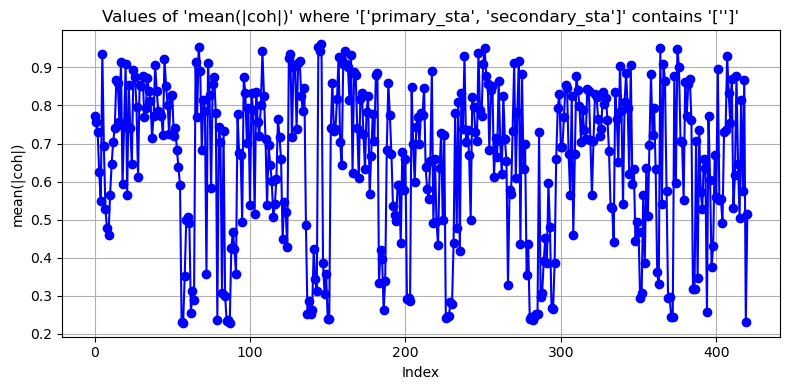

In [2]:
import matplotlib.pyplot as plt


# --- Convert to float safely ---
# Option 1: Convert to Series first (recommended)
results_float = pd.Series(results).apply(pd.to_numeric, errors='coerce').dropna().tolist()

print("Float results:", results_float)

# --- Plot the values ---
plt.figure(figsize=(8, 4))
plt.plot(results_float, marker='o', linestyle='-', color='blue')
plt.title(f"Values of '{target_column}' where '{search_columns}' contains '{substrings}'")
plt.xlabel("Index")
plt.ylabel(target_column)
plt.grid(True)
plt.tight_layout()
plt.show()


## 🌿 3. Plot Histogram of Coherence Values
A histogram is generated to visualise the distribution of mean(|coh|) for the selected subset.

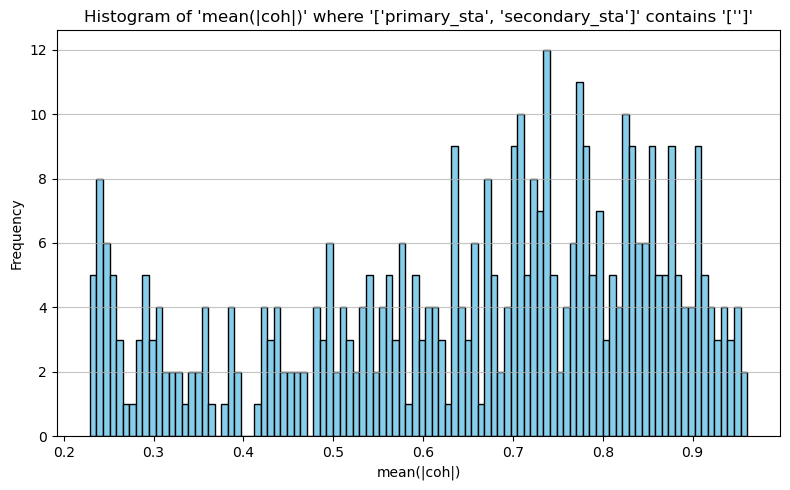

In [3]:
# --- Plot histogram ---
plt.figure(figsize=(8, 5))
plt.hist(results_float, bins=100, color='skyblue', edgecolor='black')
plt.title(f"Histogram of '{target_column}' where '{search_columns}' contains '{substrings}'")
plt.xlabel(target_column)
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()